In [1]:
def dy_dx(x):
    return 2 * x

In [2]:
dy_dx(3)

6

In [3]:
import math

In [4]:
def dz_dx(x):
    return 2 * x + math.cos(x ** 2)


In [5]:
dz_dx(2)

3.346356379136388

# Autograd


In [6]:
import torch

In [7]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [8]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [9]:
print(f"x : {x}")
print(f"y : {y}")

x : 3.0
y : 9.0


In [10]:
# y.backward()

In [11]:
# x.grad

In [12]:
z = torch.sin(y)

In [13]:
x

tensor(3., requires_grad=True)

In [14]:
y

tensor(9., grad_fn=<PowBackward0>)

In [15]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [16]:
z.backward()

In [17]:
x.grad

tensor(-5.4668)

In [18]:
# y.grad # y in not a leaf node 


### Example using Manual Gradient

In [19]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

# Model parameters
w = torch.tensor(1.0) # Weight
b = torch.tensor(0.0) # Bias

In [20]:
# Binary Cross-Entropy Loss
def binary_cross_entropy(prediction, target):
    epsilon = 1e-8 # To prevevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [21]:
# Forward pass
z = w * x + b  # weighted sum (linear transformation/sum)
y_pred = torch.sigmoid(z)  # Sigmoid activation function (Predicted probability)

# Compute binary cross-entropy loass
loss = binary_cross_entropy(y_pred, y)

In [22]:
loss

tensor(6.7012)

In [23]:
# Backpropagation

# Derivatives:

# 1. Gradient of the loss with respect to the prediction
# 1. dL/d(y_pred): Loass with respect to the prediction (Y_pred)
dLoss_dy_pred = (y_pred - y) / (y_pred * (1 - y_pred))

# 2. Gradient of the prediction with respect to the weighted sum
# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. Gradient of the weighted sum with respect to the weight
# 3. dz/dw and dz/db: z  with respect to w and b
dz_dw = x  # dz.dw = x
dz_db = 1  # dz/db = 1 (biase contribution directly to z)

dL_dw = dLoss_dy_pred * dy_pred_dz * dz_dw
dL_db = dLoss_dy_pred * dy_pred_dz * dz_db


In [24]:
print(f"Manual Gradient w.r.t. weight (dw): {dL_dw}")
print(f"Manual Gradient w.r.t. bias (db): {dL_db}")

Manual Gradient w.r.t. weight (dw): 6.691762447357178
Manual Gradient w.r.t. bias (db): 0.998770534992218


## By using Autograd for single neuron network

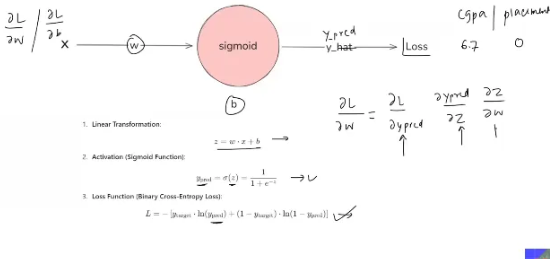

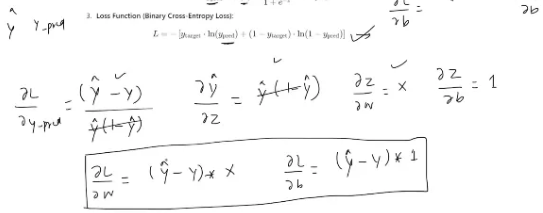

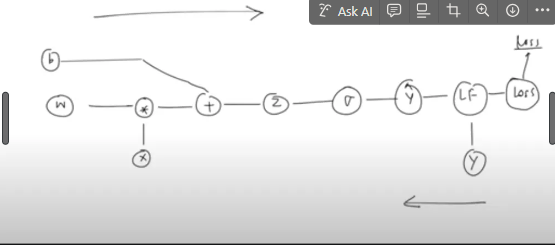

In [25]:
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

In [26]:
w = torch.tensor(1.0, requires_grad=True)  # Weight
b = torch.tensor(0.0, requires_grad=True)  # Bias

In [27]:
w

tensor(1., requires_grad=True)

In [28]:
b

tensor(0., requires_grad=True)

In [29]:
# Forward Propagation

# weighted sum (linear transformation)
z = w * x + b  

# Sigmoid activation function
y_pred = torch.sigmoid(z)  

# Compute binary cross-entropy loss
loss = binary_cross_entropy(y_pred, y)

In [30]:
print(f"Weighted sum (z): {z}")
print(f"Predicted probability (y_pred): {y_pred}")
print(f"Binary cross-entropy loss: {loss}")

Weighted sum (z): 6.699999809265137
Predicted probability (y_pred): 0.998770534992218
Binary cross-entropy loss: 6.701176166534424


In [31]:
# Backward pass
loss.backward()
print(f"Gradient w.r.t weight (dw): {w.grad}")
print(f"Gradient w.r.t bias (db): {b.grad}")

Gradient w.r.t weight (dw): 6.6917619705200195
Gradient w.r.t bias (db): 0.9987704753875732


### With Vector Input Tensors

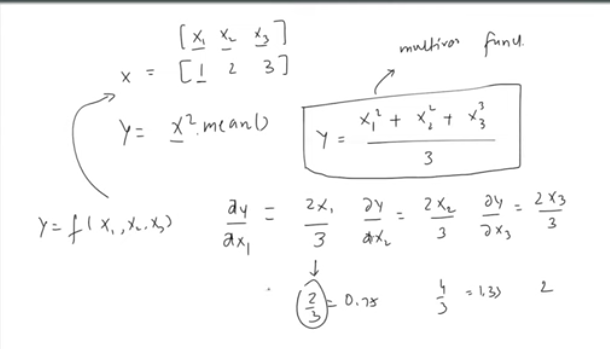

In [32]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x ** 2).mean()

In [33]:
x

tensor([1., 2., 3.], requires_grad=True)

In [34]:
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [35]:
y.backward()

In [36]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [37]:
# Clearing gradients
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [38]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [39]:
y.backward()

In [40]:
x.grad

tensor(4.)

In [41]:
x.grad.zero_()  # clear the gradients

tensor(0.)

In [42]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [43]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [44]:
y.backward()

In [45]:
x.grad

tensor(4.)

In [46]:
# option 1: requires_grad=False
x.requires_grad_(False)

tensor(2.)

In [47]:
x

tensor(2.)

In [48]:
y = x ** 2
y

tensor(4.)

In [49]:
# y.backward()  # This will raise an error because x does not require gradients 

In [50]:
# Option 2: Detaching the tensor
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [51]:
z = x.detach() # detached tensor

In [52]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [53]:
y.backward()

In [54]:
y1 = z ** 2
y1

tensor(4.)

In [55]:
# y1.backward()  # this will raise an error beacuse z does not requires gradients

In [56]:
# Option 3: with torch.no_grad()
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [57]:
with torch.no_grad():
    y = x ** 2

In [58]:
y

tensor(4.)

In [59]:
# y.backward()  # This will raise an error because x does not require gradients